In [15]:
import pandas as pd #import panda
import numpy as np  #import numpy
import matplotlib.pyplot as plt #import pyplot
import seaborn as sns  #import seaborn
#from sklearn import 

In [3]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape  #dimenssion 

(768, 9)

In [7]:
df.dtypes  #types of column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isnull().sum()  #check missing data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
outliers = df.loc[df['Pregnancies'] < 0 , 'Pregnancies']  #check for anomalies
outliers

Series([], Name: Pregnancies, dtype: int64)


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.corr()  #calculate correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


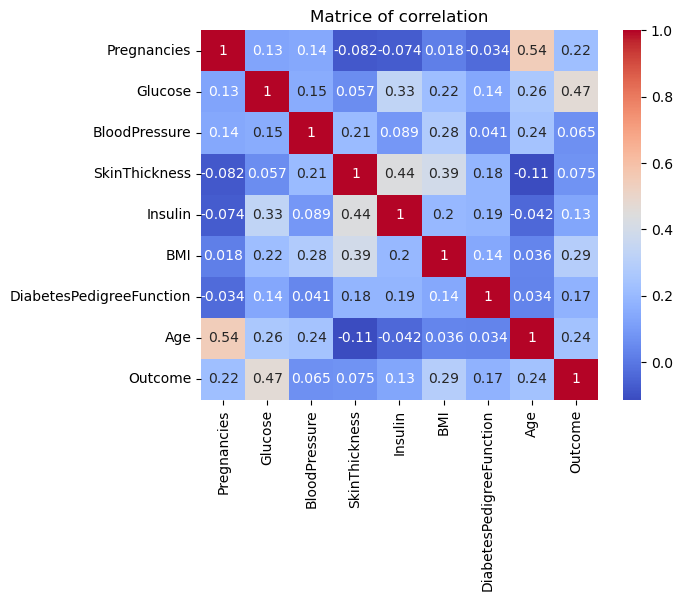

In [36]:
sns.heatmap(df.corr(), annot=True , cmap='coolwarm')
plt.title('Matrice of correlation')
plt.show()

In [22]:
#split dataframe into actual data and labels
data = df.iloc[: , :-1]
labels = df.iloc[: , -1]

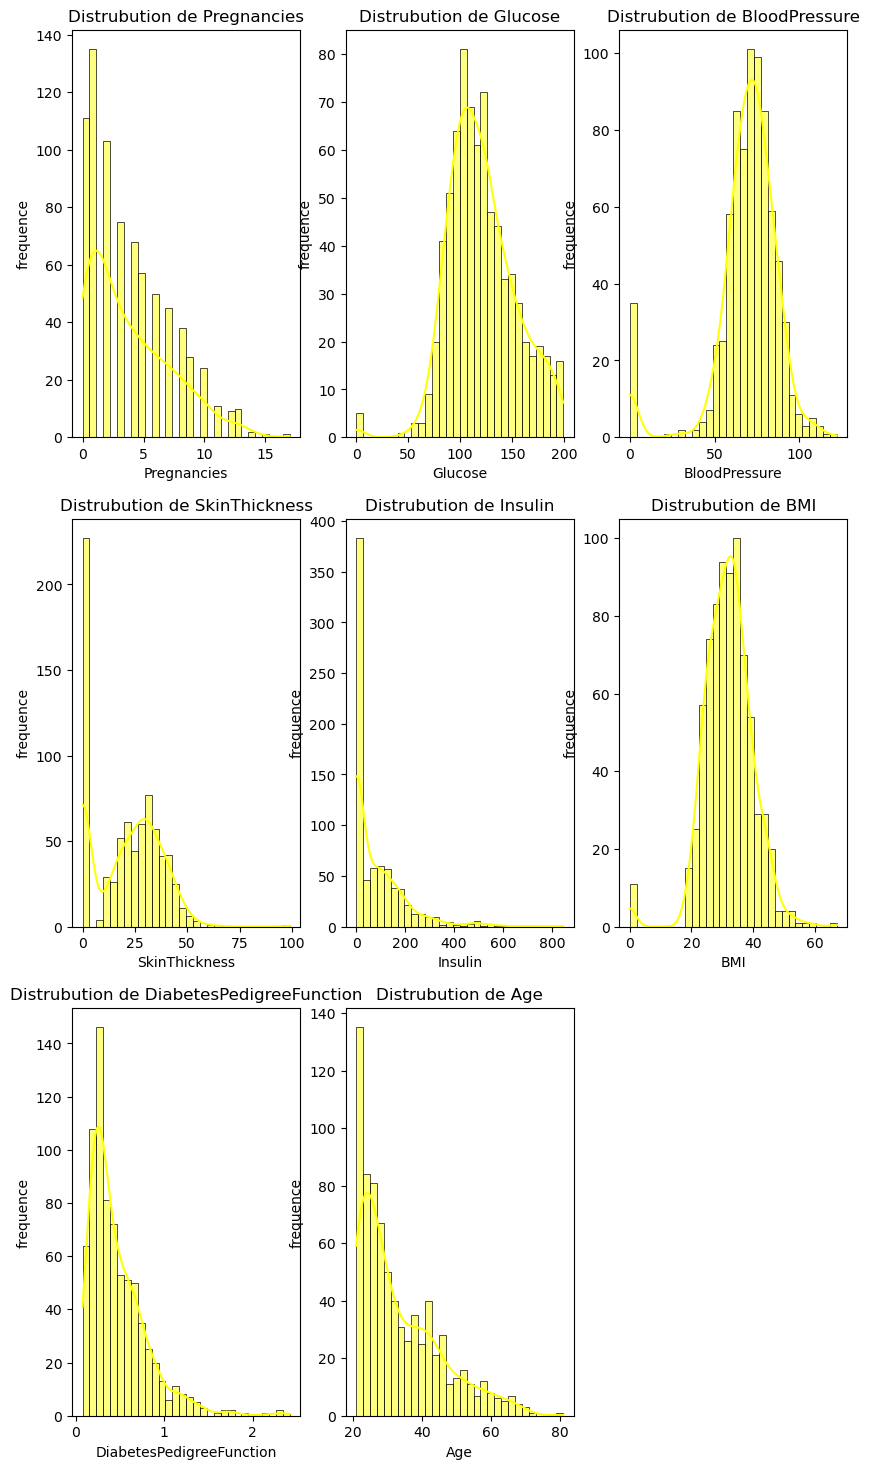

In [53]:
#verifie distribution and values 
plt.figure(figsize=(10,18))

for i,col in enumerate(data , 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], bins = 30 ,  kde=True , color = 'yellow')
    plt.title('Distrubution de '+col)
    plt.xlabel(col)
    plt.ylabel('frequence')


In [54]:
#corriger les outliers
df.loc[df['Glucose']==0 ,'Glucose'].count()
outlier_col = ['Glucose', 'BloodPressure','SkinThickness' , 'Insulin', 'BMI']

In [62]:
for i in outlier_col:
    df[i] = df[i].replace(0 , np.nan)
    
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [63]:
for i in outlier_col:
    df[i].fillna(df[i].median() , inplace=True)
    
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

data_train , data_test , labels_train , labels_test = train_test_split(data , labels , test_size=0.2 , random_state=0)
data_train.shape , labels_train.shape , data_test.shape , labels_test.shape

((614, 8), (614,), (154, 8), (154,))

In [103]:
#tain model
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(random_state=0 , max_iter=700)
lrmodel.fit(data_train , labels_train)

LogisticRegression(max_iter=700, random_state=0)

In [104]:
#accuracy score
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

accuracy1= lrmodel.score(data_test , labels_test)
labels_predicted = lrmodel.predict(data_test)
accuracy2 = accuracy_score(labels_test , labels_predicted)
accuracy1 , accuracy2 

(0.8246753246753247, 0.8246753246753247)

In [105]:
confusion_mat = confusion_matrix(labels_test , labels_predicted)
confusion_mat

array([[98,  9],
       [18, 29]], dtype=int64)

In [106]:
report = classification_report(labels_test , labels_predicted)
report

'              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88       107\n           1       0.76      0.62      0.68        47\n\n    accuracy                           0.82       154\n   macro avg       0.80      0.77      0.78       154\nweighted avg       0.82      0.82      0.82       154\n'

In [107]:
report = classification_report(labels_test , labels_predicted, output_dict=True)
for label, metrics in report.items():
    if label.isdigit():  # Check if the key is a class label
        print(f'Class: {label}')
        for metric, value in metrics.items():
            if metric != 'support':  # Exclude 'support' from printing
                print(f'{metric.capitalize()}: {value:.2f}')
        print('\n')

Class: 0
Precision: 0.84
Recall: 0.92
F1-score: 0.88


Class: 1
Precision: 0.76
Recall: 0.62
F1-score: 0.68




In [112]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(data_train , labels_train)

labels_predicted_2 = dtmodel.predict(data_test)

score_2 = dtmodel.score(data_test , labels_test)
accuracy_2 = accuracy_score(labels_test , labels_predicted)
confusion_mat_2 = confusion_matrix(labels_test , labels_predicted)
score_2, accuracy_2, confusion_mat_2

(0.7987012987012987,
 0.8246753246753247,
 array([[98,  9],
        [18, 29]], dtype=int64))

In [115]:
report = classification_report(labels_test , labels_predicted_2, output_dict=True)
for label, metrics in report.items():
    if label.isdigit():  # Check if the key is a class label
        print(f'Class: {label}')
        for metric, value in metrics.items():
            if metric != 'support':  # Exclude 'support' from printing
                print(f'{metric.capitalize()}: {value:.2f}')
        print('\n')

Class: 0
Precision: 0.87
Recall: 0.84
F1-score: 0.85


Class: 1
Precision: 0.66
Recall: 0.70
F1-score: 0.68




In [117]:
dtmodel.feature_importances_

array([0.05838959, 0.32014762, 0.10661224, 0.02651031, 0.03341567,
       0.1738483 , 0.1457779 , 0.13529837])

In [126]:
for col , feat in zip(df.columns , dtmodel.feature_importances_):
    print('features : ',col , ' \t\t\t | importance : ' , feat)

features :  Pregnancies  			 | importance :  0.05838959022746466
features :  Glucose  			 | importance :  0.3201476232142613
features :  BloodPressure  			 | importance :  0.10661224037932399
features :  SkinThickness  			 | importance :  0.026510310524679632
features :  Insulin  			 | importance :  0.03341566601338676
features :  BMI  			 | importance :  0.1738482984936364
features :  DiabetesPedigreeFunction  			 | importance :  0.14577789629093088
features :  Age  			 | importance :  0.13529837485631632
